<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/DNN/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN Model 1 Districts Included

Predictors Removed:
*   date
*   gust
*   hail
*   tornado_funnel_cloud




In [2]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

def normalise(df, column_list):
  # Normalises df columns in column_list returning a dictionary of column_name: (min_value, max_value) that can be used to recover the original values
  params = dict()

  for col in column_list:
    min = df[col].min()
    max = df[col].max()
    params[col] = (min, max)
    df[col] = (df[col] - min) / (max - min)

  return params


def normalise_w_params(df, params, column_list):
  # Normalises df columns using the provided params
  for col in column_list:
    min = params[col][0]
    max = params[col][1]
    df[col] = (df[col] - min) / (max - min)


def denormalise(df, params, column_list):
  # Uses the params dictionary produced during normalisation and a list of columns to recover their original values
  for col in column_list:
    min = params[col][0]
    max = params[col][1]
    df[col] = (df[col] * (max-min)) + min


def flat_list(nested_list):
  return [value for sublist in nested_list for value in sublist]

In [152]:
generic = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/DNN/DNN_generic_set.csv')

Model Specific Code goes here

In [153]:
norm = ['crime_count', 'temp', 'dewp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'max', 'min', 'prcp', 'sndp', 'year']
data = generic.drop(['date', 'gust', 'hail', 'tornado_funnel_cloud'], axis=1)

# norm = ['crime_count', 'temp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'prcp', 'sndp']
# cols = ['crime_count', 'temp', 'slp', 'stp', 'visib', 'wdsp', 'mxpsd', 'prcp', 'sndp', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# data = generic[cols]
scale_params = normalise(data, norm)

In [154]:
len(data.columns)

59

In [155]:
data.describe()

,crime_count,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min,prcp,sndp,fog,rain_drizzle,snow_ice_pellets,thunder,year,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,district_1.0,district_2.0,district_3.0,district_4.0,district_5.0,district_6.0,district_7.0,district_8.0,district_9.0,district_10.0,district_11.0,district_12.0,district_14.0,district_15.0,district_16.0,district_17.0,district_18.0,district_19.0,district_20.0,district_22.0,district_24.0,district_25.0,district_31.0
count,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.00000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000,39815.000000
mean,0.221713,0.653886,0.640334,0.456853,0.949347,0.898932,0.298549,0.316685,0.653899,0.650775,0.030309,0.02594,0.045134,0.387668,0.132990,0.124400,0.499799,0.142685,0.142986,0.142710,0.142735,0.142961,0.143187,0.142735,0.082155,0.085068,0.085119,0.077031,0.084842,0.084868,0.082230,0.084767,0.084742,0.082055,0.084742,0.082381,0.009117,0.009167,0.009017,0.009042,0.009042,0.009117,0.009017,0.008992,0.009092,0.009167,0.009042,0.009092,0.009117,0.009117,0.009017,0.009092,0.009117,0.009042,0.009042,0.009117,0.009142,0.009067,0.000176
std,0.083496,0.198255,0.187973,0.140349,0.156688,0.165857,0.154001,0.147970,0.211845,0.190256,0.071916,0.08970,0.207600,0.487224,0.339568,0.330042,0.353576,0.349756,0.350063,0.349781,0.349807,0.350038,0.350268,0.349807,0.274604,0.278987,0.279062,0.266644,0.278651,0.278688,0.274719,0.278538,0.278501,0.274451,0.278501,0.274948,0.095049,0.095308,0.094528,0.094659,0.094659,0.095049,0.094528,0.094398,0.094919,0.095308,0.094659,0.094919,0.095049,0.095049,0.094528,0.094919,0.095049,0.094659,0.094659,0.095049,0.095178,0.094789,0.013258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.165517,0.496986,0.503457,0.365686,0.973759,0.871698,0.186084,0.203560,0.477627,0.512155,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.220690,0.660080,0.642081,0.448039,0.977869,0.981132,0.284790,0.300334,0.677288,0.651349,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.275862,0.834896,0.801778,0.542157,0.982078,1.0000

In [156]:
# Seperate train / eval predictors / targets
qty_predictors = len(data.columns) - 1
qty_targets = 1
train_size = int(len(data)*0.8)

train_predictors = data.iloc[:train_size,1:]
train_targets = data.iloc[:train_size,0]

eval_predictors = data.iloc[train_size:,1:]
eval_targets = data.iloc[train_size:,0]

In [157]:
# Design model: layers ~ inputs(61) ->  h1(30) -> outputs(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (qty_predictors,)))
model.add(tf.keras.layers.Dense(30, activation='sigmoid')) # h1
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.0001))


# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors], activation))
# model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [158]:
# View model
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 30)                1770      
                                                                 
 dense_48 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [159]:
# Train model
history = model.fit(train_predictors, train_targets, epochs=10)

Epoch 1/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0080
Epoch 2/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0066
Epoch 3/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0064
Epoch 4/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 5/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 6/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 7/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 8/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 9/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0062
Epoch 10/10
996/996 [==============================] - 2s 2ms/step - loss: 0.0062


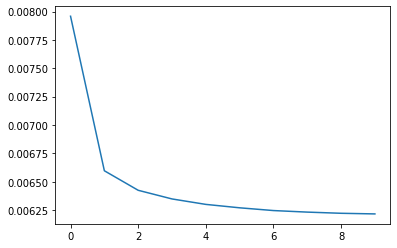

In [160]:
# View training history
plt.plot(history.history['loss'])

In [161]:
# Test model
eval_predictions = flat_list(model.predict(eval_predictors))

In [162]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((eval_targets.values - eval_predictions)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(train_targets)

rmse = np.sqrt(np.mean((eval_targets.values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.0794012246700777
Using the training data mean of 0.22161635495199783 would have has resulted in a RMSE of 0.08379558968638116


In [163]:
# Testing

test = pd.read_csv('https://raw.githubusercontent.com/MattIzon/16010269_DataAnalytics/main/DNN/DNN_test_set.csv')
test.drop(['date', 'gust', 'hail', 'tornado_funnel_cloud'], axis=1, inplace=True)
test_predictors = test.iloc[:,1:]
normalise_w_params(test_predictors, scale_params, norm[1:])

test_predictions = pd.DataFrame(flat_list(model.predict(test_predictors)), columns=['crime_count'])
denormalise(test_predictions, scale_params, ['crime_count'])
test_targets = test['crime_count']

results = pd.DataFrame()
results['predicted'] = test_predictions
results['actual'] = test_targets
results['error_squared'] = (results['predicted'] - results['actual']) ** 2
print(results)

print('The RMSE on the test values is {}.'.format(np.sqrt(np.mean(results.error_squared))))
print()

     predicted  actual  error_squared
0    37.626774      42      19.125107
1    34.115997      26      65.869412
2    31.344362      21     107.005831
3    32.149845      38      34.224312
4    32.979614      42      81.367359
..         ...     ...            ...
397  31.389843      26      29.050407
398  36.039726      39       8.763221
399  31.155888      28       9.959627
400  35.607365      32      13.013080
401  36.243469      32      18.007031

[402 rows x 3 columns]
The RMSE on the test values is 10.763669382009649.

